# NLP - Offense Detection

### Group 07

- Carolina Rosemback - up201800171
- José Eduardo Henriques - up201806372
- Miguel Neves - up201608657

## User Manual

Run the following command in the Anaconda prompt in order to open this Jupyter Notebook with more memory usage:

```bash
jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10
```

### Notebook Structure

This notebook is separated in sections.

- **(1)** Dataset import, cleanup and tokenization
- **(2)** Data pre-processing *(choose one)*
  - **(2.1)** Bag of Words
  - **(2.2)** Bag of Words with Bigram
  - **(2.3)** Bag of Words with Trigram
  - **(2.4)** TF-IDF
- **(3)** Balancing of dataset and train/test/dev separation
- **(4)** Classifiers *(choose one)*
  - **(4.1)** Logistic Regression
  - **(4.2)** SVM
  - **(4.3)** Decision Tree
  - **(4.4)** Random Forest
  - **(4.5)** MLP (Neural Network)
  
### Usage

One must run these sequentially. Aditionally, upon changes on a given section, following sections must be re-run.  

Each classifier is separated in two parts. **(4.X.1)** One where the classifier is applied to the training set and **(4.X.2)** another where it tries to predict the result for the given set (either test or dev sets). For each classifier, one must run (4.X.1) cell **at least once** before being able to run the respective (4.X.2) cells.

If while running (4.5.3) MLP learning curve graphic an error occurs or an interruption is made, the kernel might need to be restarted.

## (1) Dataset import and tokenization

In [1]:
import pandas as pd
import re
import nltk
import numpy
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.util import ngrams


# Importing the dataset
dataset = pd.read_csv('trainv2.csv', delimiter = ',')

print(dataset)

# Cleaning and tokenizing the text

y = numpy.array([])

corpus = []


ps = PorterStemmer()
for i in range(0,9000):
    # get review and remove non alpha chars
    review = re.sub('[^a-zA-Z]', ' ', dataset['text'][i])
    # to lower-case and tokenize
    review = review.lower().split()
    # stemming and stop word removal
    review = ' '.join([ps.stem(w) for w in review if not w in set(stopwords.words('english'))])
    corpus.append(review)
    
    label = dataset['offense_rating'][i]
    
    if(round(label) == 0):
        y = numpy.append(y,0)
    elif(round(label) == 1):
        y = numpy.append(y,1)
    else:
        y = numpy.append(y,2)

print(corpus)
    
    

                                                   text  offense_rating
0     TENNESSEE: We're the best state. Nobody even c...            0.20
1     A man inserted an advertisement in the classif...            1.10
2     How many men does it take to open a can of bee...            2.40
3     Told my mom I hit 1200 Twitter followers. She ...            0.00
4     Roses are dead. Love is fake. Weddings are bas...            0.10
...                                                 ...             ...
8995  What do you call a black man on the moon? An a...            1.05
8996  when im picking someone up and they ask how lo...            0.00
8997  A black lesbian, an obese white neck-beard, an...            1.65
8998  and I recognize the need to use ALL of my plat...            0.00
8999  Get married so you can argue about fun things ...            0.10

[9000 rows x 2 columns]
['tennesse best state nobodi even come close elevennesse walk room tennesse oh shit', 'man insert advertis clas

## (2) Data pre-processing *(choose one)*

### (2.1) Bag of words

In [27]:
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer(max_features = 1000)
X = vectorizer.fit_transform(corpus).toarray()

print(vectorizer.get_feature_names())

print(X.shape, y.shape)

['abl', 'accept', 'accident', 'accord', 'account', 'acn', 'across', 'act', 'action', 'activ', 'actual', 'ad', 'add', 'adult', 'advic', 'afraid', 'african', 'age', 'ago', 'aid', 'air', 'alcohol', 'aliv', 'allow', 'almost', 'alon', 'alreadi', 'also', 'alway', 'amaz', 'america', 'american', 'angel', 'angri', 'anim', 'announc', 'annoy', 'anoth', 'answer', 'anti', 'antioxid', 'anxieti', 'anybodi', 'anymor', 'anyon', 'anyth', 'anyway', 'apart', 'appar', 'appl', 'appreci', 'approach', 'arab', 'area', 'argu', 'argument', 'arm', 'around', 'arrest', 'asian', 'ask', 'ass', 'ate', 'attack', 'attent', 'attract', 'aunti', 'averag', 'avoid', 'awar', 'away', 'babi', 'back', 'bad', 'bag', 'ball', 'banana', 'bank', 'bar', 'bartend', 'base', 'bathroom', 'bear', 'beat', 'beauti', 'becam', 'becom', 'bed', 'bedroom', 'bee', 'beer', 'begin', 'behind', 'believ', 'best', 'better', 'big', 'biggest', 'bird', 'birthday', 'bit', 'black', 'blind', 'blond', 'blood', 'blow', 'blue', 'bodi', 'book', 'born', 'boss', 'b

### (2.2) Bag of words with Bigram

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features = 1000, ngram_range = (1,2))
X = vectorizer.fit_transform(corpus).toarray()

print(vectorizer.get_feature_names())

print(X.shape, y.shape)

['abl', 'accord', 'act', 'actual', 'age', 'ago', 'air', 'alcohol', 'allow', 'almost', 'alon', 'alreadi', 'also', 'alway', 'amaz', 'american', 'anoth', 'answer', 'anymor', 'anyon', 'anyth', 'appar', 'arm', 'around', 'asian', 'ask', 'aunti', 'aunti red', 'away', 'babi', 'back', 'bad', 'bag', 'bar', 'beauti', 'becom', 'bed', 'beer', 'behind', 'believ', 'best', 'better', 'big', 'birthday', 'black', 'black peopl', 'black tran', 'blind', 'blond', 'blood', 'bodi', 'book', 'bought', 'boy', 'boyfriend', 'brain', 'break', 'breath', 'bring', 'broke', 'build', 'busi', 'buy', 'call', 'came', 'car', 'care', 'cat', 'caus', 'celebr', 'cell', 'chanc', 'chang', 'check', 'child', 'children', 'chines', 'choos', 'christma', 'clean', 'close', 'coffe', 'color', 'come', 'common', 'commun', 'complet', 'contain', 'continu', 'convers', 'cool', 'cop', 'could', 'count', 'countri', 'coupl', 'creat', 'cri', 'cut', 'dad', 'dark', 'date', 'daughter', 'day', 'dead', 'death', 'decid', 'depress', 'die', 'differ', 'doctor

### (2.3) Bag of words with Trigram

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features = 1000, ngram_range = (1,3))
X = vectorizer.fit_transform(corpus).toarray()

print(vectorizer.get_feature_names())

print(X.shape, y.shape)

['abl', 'accord', 'act', 'actual', 'age', 'ago', 'air', 'alcohol', 'allow', 'alon', 'alreadi', 'also', 'alway', 'amaz', 'american', 'anoth', 'answer', 'anymor', 'anyon', 'anyth', 'appar', 'arm', 'around', 'asian', 'ask', 'aunti', 'aunti red', 'aunti red tweet', 'away', 'babi', 'back', 'bad', 'bag', 'bar', 'beauti', 'becom', 'bed', 'beer', 'behind', 'believ', 'best', 'better', 'big', 'birthday', 'black', 'black peopl', 'black tran', 'blind', 'blond', 'blood', 'bodi', 'book', 'bought', 'boy', 'boyfriend', 'brain', 'break', 'breath', 'bring', 'broke', 'build', 'busi', 'buy', 'call', 'came', 'car', 'care', 'cat', 'caus', 'cell', 'chanc', 'chang', 'check', 'child', 'children', 'chines', 'choos', 'christma', 'clean', 'close', 'coffe', 'color', 'come', 'common', 'commun', 'complet', 'contain', 'continu', 'convers', 'cool', 'cop', 'could', 'countri', 'coupl', 'creat', 'cri', 'cut', 'dad', 'dark', 'date', 'daughter', 'day', 'dead', 'death', 'decid', 'depress', 'die', 'differ', 'doctor', 'dog', 

### (2.4) TF-IDF

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus).toarray()

print(vectorizer.get_feature_names())

print(X.shape, y.shape)

['aa', 'aaa', 'aaaa', 'aaaaafddasfrw', 'aap', 'ab', 'abacu', 'abandon', 'abba', 'abbey', 'abbrevi', 'abc', 'abdomin', 'abduct', 'abdul', 'abdullah', 'abercrombi', 'aberdeen', 'abi', 'abil', 'abl', 'abnorm', 'aboard', 'abolish', 'abort', 'abound', 'abouttit', 'abra', 'abraham', 'abram', 'abroad', 'abruptli', 'absenc', 'absent', 'absolut', 'absorb', 'absorpt', 'abstain', 'abstract', 'absurd', 'abu', 'abulia', 'abund', 'abus', 'abuzz', 'abysm', 'abyss', 'academ', 'academi', 'accent', 'accept', 'access', 'accessori', 'acci', 'accid', 'accident', 'accommod', 'accomplish', 'accord', 'accordion', 'account', 'accumul', 'accur', 'accuraci', 'accus', 'ace', 'aceton', 'ach', 'achiev', 'acid', 'ackl', 'acknowledg', 'aclu', 'acn', 'acquir', 'across', 'act', 'actimist', 'action', 'activ', 'activis', 'activist', 'actor', 'actress', 'actual', 'ad', 'adam', 'adapt', 'add', 'adderal', 'addict', 'addison', 'addit', 'address', 'adel', 'adept', 'adha', 'adhd', 'adhes', 'adject', 'adjust', 'adkwodrtrgfvnfif

## (3) Balancing of dataset and train/test/dev separation

In [28]:
# check version number
import imblearn
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

zeros = 0
ones = 0
twos = 0
    
over = SMOTE({0:6483,1:3000,2:3000})
under = RandomUnderSampler({0: 3000, 1: 3000, 2: 3000})
X, y = over.fit_resample(X, y)
X, y = under.fit_resample(X, y)

        
for i in list(y):
    if i == 0:
        zeros+=1
    elif i == 1:
        ones+=1
    else:
        twos +=1   

        
print("Number of zeros: ", zeros)
print("Number of ones: ", ones)
print("Number of twos: ", twos)


percentage = 0.15
aux = percentage*len(y)

x_temp, x_test, y_temp, y_test = train_test_split(X, y, test_size = percentage, random_state = 0)
x_train, x_dev, y_train, y_dev = train_test_split(x_temp, y_temp, test_size = aux/(len(y)-aux), random_state = 0)

print("\nTrain:")
print(x_train.shape, y_train.shape)
print("Test:")
print(x_test.shape, y_test.shape)
print("Dev:")
print(x_dev.shape, y_dev.shape)

C:\Users\ZezeH\anaconda3\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy={0: 6483, 1: 3000, 2: 3000} as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(
C:\Users\ZezeH\anaconda3\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy={0: 3000, 1: 3000, 2: 3000} as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(
C:\Users\ZezeH\anaconda3\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (6483) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 3000)
  warnings.warn(


Number of zeros:  3000
Number of ones:  3000
Number of twos:  3000

Train:
(6300, 1000) (6300,)
Test:
(1350, 1000) (1350,)
Dev:
(1350, 1000) (1350,)


## (4) Classifiers *(choose one)*

### (4.1.1) Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
import time


start = time.time()
lr_classifier = LogisticRegression(max_iter=1000, penalty="l2")
lr_classifier.fit(x_train, y_train)
print("Elapsed time: " + str(time.time() - start))

Elapsed time: 1.786738395690918


### (4.1.2) Logistic Regression: Test

Elapsed time: 0.05901026725769043
Accuracy:  0.8140740740740741
Precision:  [0.79545455 0.78901099 0.85714286]
Recall:  [0.80831409 0.78213508 0.85152838]
F1:  [0.80183276 0.78555799 0.8543264 ]
F1 avg:  0.8139057146538718


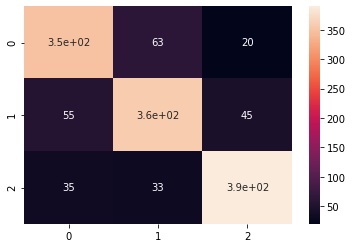

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import time


start = time.time()
y_pred = lr_classifier.predict(x_test)
print("Elapsed time: "+ str(time.time() - start))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average=None))
print('Recall: ', recall_score(y_test, y_pred, average=None))
print('F1: ', f1_score(y_test, y_pred, average=None))
print('F1 avg: ', f1_score(y_test, y_pred, average="macro"))

### (4.1.2) Logistic Regression: Dev

Elapsed time: 0.008956432342529297
Accuracy:  0.45481481481481484
Precision:  [0.50927487 0.40909091 0.41481481]
Recall:  [0.67260579 0.31648352 0.37668161]
F1:  [0.57965451 0.35687732 0.39482961]
F1 avg:  0.44378714873253755


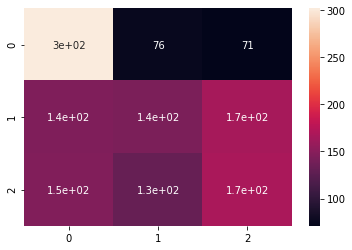

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import time


start = time.time()
y_pred = lr_classifier.predict(x_dev)
print("Elapsed time: " + str(time.time() - start))

sns.heatmap(confusion_matrix(y_dev, y_pred), annot=True)
print('Accuracy: ', accuracy_score(y_dev, y_pred))
print('Precision: ', precision_score(y_dev, y_pred, average=None))
print('Recall: ', recall_score(y_dev, y_pred, average=None))
print('F1: ', f1_score(y_dev, y_pred, average=None, labels=numpy.unique(y_pred)))
print('F1 avg: ', f1_score(y_dev, y_pred, average="macro"))

### (4.2.1) SVM

In [31]:
from sklearn.svm import SVC
import time


start = time.time()
svm_classifier = SVC()
svm_classifier.fit(x_train, y_train)
print("Elapsed time: " + str(time.time() - start))

Elapsed time: 40.66535186767578


### (4.2.2) SVM: Test

Elapsed time: 122.29316425323486
Accuracy:  0.8496296296296296
Precision:  [0.70735786 0.96226415 0.96325459]
Recall:  [0.97690531 0.77777778 0.80131004]
F1:  [0.82056256 0.86024096 0.87485101]
F1 avg:  0.8518848458623416


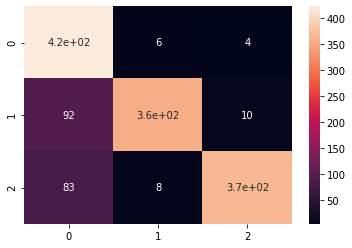

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import time


start = time.time()
y_pred = svm_classifier.predict(x_test)
print("Elapsed time: "+ str(time.time() - start))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average=None))
print('Recall: ', recall_score(y_test, y_pred, average=None))
print('F1: ', f1_score(y_test, y_pred, average=None, labels=numpy.unique(y_pred)))
print('F1 avg: ', f1_score(y_test, y_pred, average="macro"))

### (4.2.2) SVM: Dev

Elapsed time: 7.9932191371917725
Accuracy:  0.48074074074074075
Precision:  [0.59656652 0.41573034 0.42234848]
Recall:  [0.61915367 0.32527473 0.5       ]
F1:  [0.60765027 0.3649815  0.45790554]
F1 avg:  0.4768457738958491


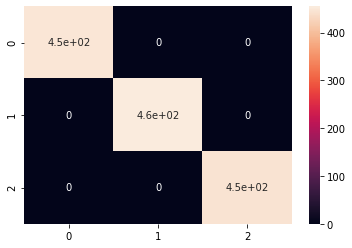

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import time


start = time.time()
y_pred = svm_classifier.predict(x_dev)
print("Elapsed time: " + str(time.time() - start))

sns.heatmap(confusion_matrix(y_dev, y_dev), annot=True)
print('Accuracy: ', accuracy_score(y_dev, y_pred))
print('Precision: ', precision_score(y_dev, y_pred, average=None))
print('Recall: ', recall_score(y_dev, y_pred, average=None))
print('F1: ', f1_score(y_dev, y_pred, average=None, labels=numpy.unique(y_pred)))
print('F1 avg: ', f1_score(y_dev, y_pred, average="macro"))

### (4.3.1) Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
import time


start = time.time()
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)
print("Elapsed time: " + str(time.time() - start))

Elapsed time: 7.956791400909424


### (4.3.2) Decision Tree: Test

Elapsed time: 0.07700252532958984
Accuracy:  0.725925925925926
Precision:  [0.72767857 0.70132743 0.74888889]
Recall:  [0.75288684 0.69063181 0.73580786]
F1:  [0.7400681  0.69593853 0.74229075]
F1 avg:  0.7260991274714598


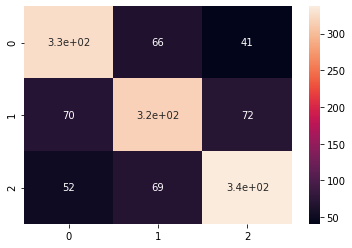

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import time


start = time.time()
y_pred = dt_classifier.predict(x_test)
print("Elapsed time: " + str(time.time() - start))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average=None))
print('Recall: ', recall_score(y_test, y_pred, average=None))
print('F1: ', f1_score(y_test, y_pred, average=None))
print('F1 avg: ', f1_score(y_test, y_pred, average="macro"))

### (4.3.2) Decision Tree: Dev

Elapsed time: 0.016002416610717773
Accuracy:  0.44
Precision:  [0.47833066 0.4155496  0.39830508]
Recall:  [0.6636971  0.34065934 0.3161435 ]
F1:  [0.55597015 0.37439614 0.3525    ]
F1 avg:  0.4276220948398106


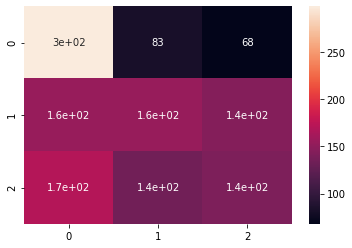

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import time


start = time.time()
y_pred = dt_classifier.predict(x_dev)
print("Elapsed time: " + str(time.time() - start))

sns.heatmap(confusion_matrix(y_dev, y_pred), annot=True)
print('Accuracy: ', accuracy_score(y_dev, y_pred))
print('Precision: ', precision_score(y_dev, y_pred, average=None))
print('Recall: ', recall_score(y_dev, y_pred, average=None))
print('F1: ', f1_score(y_dev, y_pred, average=None))
print('F1 avg: ', f1_score(y_dev, y_pred, average="macro"))

### (4.4.1) Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
import time


start = time.time()
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train, y_train)
print("Elapsed time: " + str(time.time() - start))

Elapsed time: 15.710980653762817


### (4.4.2) Random Forest : Test

Elapsed time: 0.34803104400634766
Accuracy:  0.8444444444444444
Precision:  [0.78674948 0.90841584 0.8488121 ]
Recall:  [0.87759815 0.79956427 0.8580786 ]
F1:  [0.82969432 0.85052144 0.8534202 ]
F1 avg:  0.8445453184773494


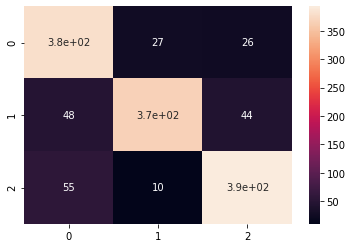

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import time


start = time.time()
y_pred = rf_classifier.predict(x_test)
print("Elapsed time: " + str(time.time() - start))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average=None))
print('Recall: ', recall_score(y_test, y_pred, average=None))
print('F1: ', f1_score(y_test, y_pred, average=None))
print('F1 avg: ', f1_score(y_test, y_pred, average="macro"))

### (4.4.2) Random Forest : Dev

Elapsed time: 0.1629941463470459
Accuracy:  0.46
Precision:  [0.49688474 0.43274854 0.42076503]
Recall:  [0.71046771 0.32527473 0.34529148]
F1:  [0.5847846  0.37139272 0.37931034]
F1 avg:  0.4451625562736585


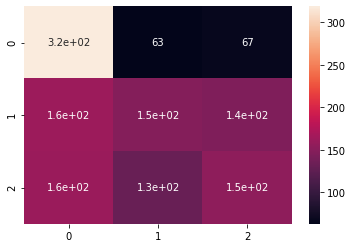

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import time


start = time.time()
y_pred = rf_classifier.predict(x_dev)
print("Elapsed time: " + str(time.time() - start))

sns.heatmap(confusion_matrix(y_dev, y_pred), annot=True)
print('Accuracy: ', accuracy_score(y_dev, y_pred))
print('Precision: ', precision_score(y_dev, y_pred, average=None))
print('Recall: ', recall_score(y_dev, y_pred, average=None))
print('F1: ', f1_score(y_dev, y_pred, average=None))
print('F1 avg: ', f1_score(y_dev, y_pred, average="macro"))

### (4.5.1) MLP (Neural Network):

In [25]:
from sklearn.neural_network import MLPClassifier
import time

start = time.time()
mlp_classifier = MLPClassifier(max_iter=750, learning_rate="adaptive", alpha=1e-5, random_state=1, early_stopping=True)
mlp_classifier.fit(x_train, y_train)
print("Elapsed time: " + str(time.time() - start))

Elapsed time: 74.64514827728271


### (4.5.2) MLP (Neural Network): Test

Accuracy:  0.8392592592592593
Precision:  [0.86486486 0.78834951 0.87526882]
Recall:  [0.73903002 0.88453159 0.88864629]
F1:  [0.79701121 0.83367556 0.88190683]
F1 avg:  0.8375311994068783


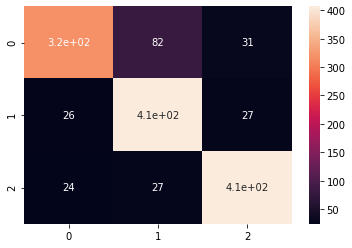

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import time


start = time.time()
y_pred = mlp_classifier.predict(x_test)
print("Elapsed time: " + str(time.time() - start))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average=None))
print('Recall: ', recall_score(y_test, y_pred, average=None))
print('F1: ', f1_score(y_test, y_pred, average=None))
print('F1 avg: ', f1_score(y_test, y_pred, average="macro"))

### (4.5.2) MLP (Neural Network): Dev

Elapsed time: 0.09399914741516113
Accuracy:  0.8392592592592593
Precision:  [0.85365854 0.78787879 0.88314607]
Recall:  [0.77951002 0.85714286 0.88116592]
F1:  [0.81490105 0.82105263 0.88215488]
F1 avg:  0.839369520487916


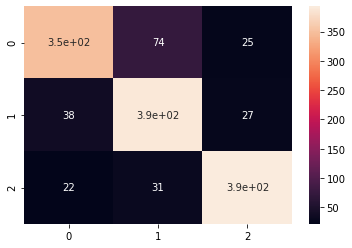

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import time


start = time.time()
y_pred = mlp_classifier.predict(x_dev)
print("Elapsed time: " + str(time.time() - start))

sns.heatmap(confusion_matrix(y_dev, y_pred), annot=True)
print('Accuracy: ', accuracy_score(y_dev, y_pred))
print('Precision: ', precision_score(y_dev, y_pred, average=None))
print('Recall: ', recall_score(y_dev, y_pred, average=None))
print('F1: ', f1_score(y_dev, y_pred, average=None))
print('F1 avg: ', f1_score(y_dev, y_pred, average="macro"))

### (4.5.3) MLP (Neural Network): Graphic

In [ ]:
from sklearn.neural_network import MLPClassifier

import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.exceptions import ConvergenceWarning

# different learning rate schedules and momentum parameters
params = [{'solver': 'sgd', 'activation': 'relu'},
          {'solver': 'adam', 'activation': 'relu'},
          {'solver': 'sgd', 'activation': 'tanh'},
          {'solver': 'adam', 'activation': 'tanh'},
          {'solver': 'sgd', 'activation': 'identity'},
          {'solver': 'adam', 'activation': 'identity'},
          {'solver': 'sgd', 'activation': 'logistic'},
          {'solver': 'adam', 'activation': 'logistic'}]

labels = ["sgd with relu", "adam with relu",
          "sgd with tanh", "adam with tanh",
          "sgd with identity", "adam with identity",
          "sgd with logistic", "adam with logistic"]

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'red', 'linestyle': '-.'},
             {'c': 'green', 'linestyle': '-.'},
             {'c': 'red', 'linestyle': ':'},
             {'c': 'green', 'linestyle': ':'}]


def plot_on_dataset(X, y, ax, name):
    # for each dataset, plot learning for each learning strategy
    print("\nlearning on dataset %s" % name)
    print(ax);
    ax.set_title(name)
    mlps = []
    max_iter = 500
        
    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(random_state=0, max_iter=max_iter, **param)

        # some parameter combinations will not converge as can be seen on the
        # plots so they are ignored here
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
            mlp.fit(X, y)

        mlps.append(mlp)
        print("Training set accuracy: %f" % mlp.score(X, y))
        print("Training set loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
        ax.plot(mlp.loss_curve_, label=label, **args)


print("Running...")        
        
fig, axes = plt.subplots(1, 1, figsize=(15, 10))

plot_on_dataset(X=x_train, y=y_train, ax=axes, name='MLP learning curve')

fig.legend(axes.get_lines(), labels, ncol=3, loc="upper center")
plt.show()


In [ ]:
# Simple test
import re

sentence = input("Enter sentence: ")
sentence = re.sub('[^a-zA-Z]', ' ', sentence).lower().split()
sentence = ' '.join([ps.stem(w) for w in sentence])
X = vectorizer.transform([sentence]).toarray()

print(X.shape)
print(X)

while(True):
    print("[1] Logistic Regression\n[2] SVM\n[3] Decision Tree\n[4] Random Forest\n[5] MLP")
    option = input("Choose a classifier (enter respective number): ")
    if(option >= 1 and option <= 5):
        break;

classifier = None
if(option == 1):
    classifier = lr_classifier
elif(option == 2):
    classifier = svm_classifier
elif(option == 3):
    classifier = svm_classifier
elif(option == 4):
    classifier = svm_classifier
elif(option == 5):
    classifier = svm_classifier
else
    print("ERROR")

if(classifier is not None):
    prediction = classifier.predict(X)
    if(classifier.predict(X) == [0]):
        print('Not offensive')
    elif(classifier.predict(X) == [1]):
        print('Offensive')
    elif(classifier.predict(X) == [2]):
        print('Very Offensive')